In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('strcom_cfid_dropna.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [3]:
df

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_elec_aff_mult_voro_coord,jml_mol_vol_subs_atom_mass,jml_is_halogen,jml_atom_mass_subs_first_ion_en,jml_row,jml_mol_vol_mult_atom_mass,jml_voro_coord_divi_therm_cond,jml_voro_coord_subs_mp,...,band center,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,dist from 1 clusters |APE| < 0.010,dist from 3 clusters |APE| < 0.010,dist from 5 clusters |APE| < 0.010,piezo_cl
0,2049.453333,1310.884233,9.944000,-99.397890,0.333333,106.720787,5.000000,1944.377461,3.755619,-729.666667,...,5.653612,0.209607,0.038059,-0.267904,-0.204228,0.063676,0.701020,0.703350,0.710769,0
1,2522.626667,1782.214733,8.933333,-32.926260,0.333333,37.004750,3.333333,633.484450,187.496735,-986.466667,...,5.948123,0.792998,0.142625,-0.338381,-0.338381,0.000000,0.042426,0.053001,0.061556,0
2,2203.761333,1645.883077,1.756667,-33.112400,0.000000,33.227570,3.333333,404.210146,38.849978,-971.910000,...,5.728818,0.820234,0.142420,-0.338381,-0.338381,0.000000,0.043640,0.055786,0.063077,0
3,2354.261333,1706.887783,1.756667,-17.797733,0.000000,20.108892,3.000000,317.917999,38.847200,-1048.016667,...,6.310468,0.917619,0.214967,-0.415606,-0.205744,0.209862,0.659829,0.662359,0.663807,0
4,3351.411333,2367.576783,2.762000,-59.007823,0.000000,65.232258,3.666667,795.380484,38.826578,-1288.640000,...,5.125398,0.792998,0.178436,-0.338381,-0.338381,0.000000,0.027835,0.037396,0.045798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1706.496250,1231.100713,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,7.017906,0.894601,0.162920,-0.295049,-0.295049,0.000000,0.578102,0.579302,0.581360,0
2859,2434.392500,1781.624513,4.516250,-23.812375,0.000000,28.220980,3.000000,391.696152,28.315815,-740.850000,...,4.866179,0.779730,0.169250,-0.328019,-0.328019,0.000000,0.028972,0.040004,0.045299,1
2860,2448.367500,2285.136075,4.094250,-12.009025,0.000000,13.155908,2.500000,206.899764,28.282723,-1523.372500,...,6.032056,0.779730,0.123519,-0.295049,-0.295049,0.000000,0.048762,0.057012,0.061114,1
2861,1706.496250,1231.100713,5.810000,-12.278451,0.250000,13.362209,2.500000,244.211142,59.865814,-586.630000,...,6.413407,0.894601,0.178934,-0.295049,-0.295049,0.000000,0.444659,0.447249,0.449899,0


In [4]:
y = df.iloc[:,1923].values
X = df.iloc[:,0:1923].values


In [6]:
feat_labels = df.columns[0:1923]
print(feat_labels)

Index(['jml_bp_mult_atom_rad', 'jml_hfus_add_bp',
       'jml_elec_aff_mult_voro_coord', 'jml_mol_vol_subs_atom_mass',
       'jml_is_halogen', 'jml_atom_mass_subs_first_ion_en', 'jml_row',
       'jml_mol_vol_mult_atom_mass', 'jml_voro_coord_divi_therm_cond',
       'jml_voro_coord_subs_mp',
       ...
       '10-norm', 'band center', 'max ionic char', 'avg ionic char',
       'HOMO_energy', 'LUMO_energy', 'gap_AO',
       'dist from 1 clusters |APE| < 0.010',
       'dist from 3 clusters |APE| < 0.010',
       'dist from 5 clusters |APE| < 0.010'],
      dtype='object', length=1923)


In [7]:
feat_labels = df.columns[0:1923]

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X,y)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


In [8]:
importances

array([0.00088553, 0.00053083, 0.00081549, ..., 0.00064388, 0.00092248,
       0.00113405])

In [9]:
indices

array([1695, 1903, 1564, ...,  371,  148,  270], dtype=int64)

In [10]:
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) vpa                            0.003945
 2) spacegroup_num                 0.003743
 3) avg_dev neighbor distance variation 0.003734
 4) density                        0.002915
 5) jml_ndunfill                   0.002898
 6) crystal_system_int             0.002673
 7) jml_mol_vol_divi_polzbl        0.002528
 8) maximum neighbor distance variation 0.002390
 9) jml_first_ion_en_divi_hfus     0.002352
10) jml_atom_rad_divi_hfus         0.002304
11) jml_voro_coord_divi_hfus       0.002299
12) range neighbor distance variation 0.002278
13) mean ordering parameter shell 2 0.002270
14) mean absolute deviation in relative bond length 0.002268
15) jml_oq_enp                     0.002236
16) jml_mol_vol_divi_therm_cond    0.002185
17) jml_vpa                        0.002167
18) transition metal fraction      0.002155
19) jml_mol_vol_divi_hfus          0.002154
20) jml_voro_coord_divi_therm_cond 0.002075
21) jml_atom_rad_divi_therm_cond   0.002013
22) jml_first_ion_en_divi_mp       0.001998
2

In [ ]:
for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

In [83]:
dist=[]
for i in range(X.shape[1]):
    dist.append(feat_labels[indices[i]])
dist

['vpa',
 'spacegroup_num',
 'avg_dev neighbor distance variation',
 'density',
 'jml_ndunfill',
 'crystal_system_int',
 'jml_mol_vol_divi_polzbl',
 'maximum neighbor distance variation',
 'jml_first_ion_en_divi_hfus',
 'jml_atom_rad_divi_hfus',
 'jml_voro_coord_divi_hfus',
 'range neighbor distance variation',
 'mean ordering parameter shell 2',
 'mean absolute deviation in relative bond length',
 'jml_oq_enp',
 'jml_mol_vol_divi_therm_cond',
 'jml_vpa',
 'transition metal fraction',
 'jml_mol_vol_divi_hfus',
 'jml_voro_coord_divi_therm_cond',
 'jml_atom_rad_divi_therm_cond',
 'jml_first_ion_en_divi_mp',
 'n_symmetry_ops',
 'mean absolute deviation in relative cell size',
 'jml_voro_coord_divi_polzbl',
 'jml_atom_rad_divi_polzbl',
 'jml_first_ion_en_divi_therm_cond',
 'jml_first_ion_en_divi_polzbl',
 'jml_density',
 'jml_pack_frac',
 'mean ordering parameter shell 3',
 'jml_first_ion_en_divi_bp',
 'mean ordering parameter shell 1',
 'jml_nn_29',
 'xrd_56',
 'jml_mol_vol_divi_bp',
 'jml

In [85]:
np.save('dist.npy',dist)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [45]:
def GBDT(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    gbdt = GradientBoostingClassifier(learning_rate=0.1,n_estimators=290,max_depth=8, min_samples_split =7,random_state=0)
    gbdt.fit(X_train,y_train)
    
    y_predprob = gbdt.predict_proba(X_test)[:,1]
    y_pred = gbdt.predict(X_test)
    return(metrics.roc_auc_score(y_test, y_predprob),metrics.accuracy_score(y_test,y_pred))

In [7]:
def best(X,y):
    for i in range(2,50):
        X1 = X[:,0:i]
        y1 = y
        
        print(GBDT(X1,y1),i)

In [87]:
df_em = df[dist]
df_em

,vpa,spacegroup_num,avg_dev neighbor distance variation,density,jml_ndunfill,crystal_system_int,jml_mol_vol_divi_polzbl,maximum neighbor distance variation,jml_first_ion_en_divi_hfus,jml_atom_rad_divi_hfus,...,jml_C-15,jml_C-9,jml_C-18,jml_C-30,jml_C-32,jml_C-5,jml_C-3,jml_C-34,jml_C-19,jml_C-22
0,40.090293,121,0.034208,4.945340,0.000000,4,2.787869,0.223769,115.518496,19.053424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.629333,122,0.059831,3.833648,2.000000,4,10.104253,0.209501,2205.930222,102.936869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.555643,19,0.076257,3.101543,2.333333,5,4.851615,0.235647,1419.467335,69.492610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.287718,173,0.073002,2.175750,2.333333,2,4.760123,0.223482,1405.219390,69.022114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.089161,7,0.020435,2.574819,1.666667,6,4.736269,0.185899,1438.251709,85.430209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,13.185748,1,0.072965,3.363133,1.000000,7,10.783171,0.204109,3314.859896,131.819155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2859,11.351597,1,0.008748,3.811793,1.250000,7,6.064349,0.165095,1627.346568,87.750977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2860,10.842046,38,0.076158,2.925293,1.000000,5,6.548157,0.409067,1609.140098,82.948610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2861,11.820726,8,0.067900,3.505517,1.000000,6,10.783171,0.218953,3314.859896,131.819155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X = df_em.iloc[:,0:150].values
X

array([[4.00902933e+01, 1.21000000e+02, 3.42083117e-02, ...,
        3.71058067e+00, 4.67877785e-04, 1.18911794e-03],
       [1.16293325e+01, 1.22000000e+02, 5.98305401e-02, ...,
        4.73598273e+01, 5.58002775e-03, 1.78582555e-03],
       [1.65556434e+01, 1.90000000e+01, 7.62570855e-02, ...,
        3.67756155e+01, 9.69935265e-03, 2.90373625e-03],
       ...,
       [1.08420462e+01, 3.80000000e+01, 7.61583037e-02, ...,
        2.87363608e+01, 7.59913130e-03, 1.74450973e-03],
       [1.18207257e+01, 8.00000000e+00, 6.79003013e-02, ...,
        1.14380486e+01, 6.50517513e-03, 2.54772472e-03],
       [1.13588903e+01, 3.80000000e+01, 5.84611178e-02, ...,
        1.18513425e+01, 1.67618356e-02, 1.94198029e-03]])

In [112]:
df_X = df_em.iloc[:,0:150]

In [95]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [89]:
y = df.iloc[:,1923].values

In [98]:
best(X,y)

(0.7756869772998806, 0.787085514834206) 2
(0.7985862206292313, 0.8184991273996509) 3
(0.8285742731979291, 0.8219895287958116) 4
(0.8419753086419753, 0.8359511343804538) 5
(0.8384508164078057, 0.8254799301919721) 6
(0.8581043409000397, 0.837696335078534) 7
(0.854221425726802, 0.8429319371727748) 8
(0.867273994424532, 0.8429319371727748) 9
(0.8802070888092394, 0.8481675392670157) 10
(0.8732974910394266, 0.8516579406631762) 11
(0.8648546395858224, 0.8411867364746946) 12
(0.8542811628833133, 0.8464223385689355) 13
(0.8558144165671048, 0.8481675392670157) 14
(0.8625647152528872, 0.8551483420593369) 15
(0.8662883313420948, 0.8481675392670157) 16
(0.8640581441656711, 0.8481675392670157) 17
(0.8613301473516527, 0.8516579406631762) 18
(0.8710673038630028, 0.849912739965096) 19
(0.865452011150936, 0.8394415357766143) 20
(0.8658900836320191, 0.837696335078534) 21
(0.8726503385105535, 0.8429319371727748) 22
(0.8611310234966149, 0.8429319371727748) 23
(0.8632019115890084, 0.8429319371727748) 24
(0.

In [9]:
from sklearn.feature_selection import SelectKBest

In [105]:
from scipy.stats import pearsonr

X_pearsonr = SelectKBest(lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y)[0], X.T))).T, k=50).fit_transform(X, y)

In [106]:
best(X_pearsonr,y)

(0.6589107925129432, 0.7923211169284468) 2
(0.722700119474313, 0.806282722513089) 3
(0.8028574273197928, 0.8202443280977313) 4
(0.8169255276782158, 0.8342059336823735) 5
(0.8255973715651135, 0.8359511343804538) 6
(0.8264137793707687, 0.8307155322862129) 7
(0.8180207088809239, 0.8150087260034904) 8
(0.8176224611708482, 0.8324607329842932) 9
(0.8128235762644365, 0.8359511343804538) 10
(0.8233074472321784, 0.8324607329842932) 11
(0.826284348864994, 0.8411867364746946) 12
(0.8231581043409001, 0.8342059336823735) 13
(0.8228195937873357, 0.8289703315881326) 14
(0.8452210274790919, 0.8446771378708552) 15
(0.8321385902031063, 0.837696335078534) 16
(0.8425726802070888, 0.8359511343804538) 17
(0.8462166467542813, 0.8289703315881326) 18
(0.8364396654719236, 0.8342059336823735) 19
(0.8303863002787735, 0.8342059336823735) 20
(0.8359816806053365, 0.8307155322862129) 21
(0.8262445240939864, 0.8289703315881326) 22
(0.8397451214655515, 0.8342059336823735) 23
(0.8314814814814815, 0.8411867364746946) 24


In [10]:
from minepy import MINE
 
 #由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

#选择K个最好的特征，返回特征选择后的数据
selector1 = SelectKBest(lambda X, Y: np.array(list(map(lambda x:mic(x, Y)[0], X.T))).T, k=50)
X_mic = selector1.fit_transform(df_X, y) 

NameError: name 'df_X' is not defined

In [114]:
X_mic

array([[4.00902933e+01, 1.21000000e+02, 4.94533994e+00, ...,
        1.86810344e+01, 2.04746667e+00, 1.26732951e+06],
       [1.16293325e+01, 1.22000000e+02, 3.83364777e+00, ...,
        1.40432748e+01, 1.86148333e+00, 4.61424141e+06],
       [1.65556434e+01, 1.90000000e+01, 3.10154253e+00, ...,
        9.36221647e+00, 2.42866667e-01, 2.95189332e+06],
       ...,
       [1.08420462e+01, 3.80000000e+01, 2.92529293e+00, ...,
        8.51871345e+00, 7.51825000e-01, 5.68833158e+06],
       [1.18207257e+01, 8.00000000e+00, 3.50551729e+00, ...,
        1.52478154e+01, 8.92500000e-01, 1.60446949e+06],
       [1.13588903e+01, 3.80000000e+01, 4.39018924e+00, ...,
        2.02353449e+01, 9.01933333e-01, 1.89505621e+06]])

In [108]:
best(X_mic,y)

(0.7756869772998806, 0.787085514834206) 2
(0.8047988849064117, 0.8115183246073299) 3
(0.8365989645559538, 0.8394415357766143) 4
(0.8474512146555158, 0.8359511343804538) 5
(0.856152927120669, 0.8359511343804538) 6
(0.8528474711270411, 0.8429319371727748) 7
(0.8680605336519316, 0.849912739965096) 8
(0.8598964555953803, 0.8429319371727748) 9
(0.847152528872959, 0.8411867364746946) 10
(0.8514934289127838, 0.8481675392670157) 11
(0.8444046196734369, 0.8481675392670157) 12
(0.8506969334926324, 0.8464223385689355) 13
(0.8481680605336519, 0.837696335078534) 14
(0.8587216248506571, 0.8464223385689355) 15
(0.8619275189167662, 0.8394415357766143) 16
(0.8581441656710475, 0.8429319371727748) 17
(0.851652727996814, 0.8342059336823735) 18
(0.8509956192751892, 0.8324607329842932) 19
(0.8566308243727598, 0.8342059336823735) 20
(0.8623855037833533, 0.8359511343804538) 21
(0.8590601354042213, 0.8324607329842932) 22
(0.8551772202309836, 0.8289703315881326) 23
(0.8585623257666268, 0.8429319371727748) 24
(0

In [115]:
idx = selector1.get_feature_names_out()

In [117]:
df_mic = df_X[idx]

In [118]:
df_mic

,vpa,spacegroup_num,density,jml_mol_vol_divi_polzbl,jml_first_ion_en_divi_hfus,jml_atom_rad_divi_hfus,jml_voro_coord_divi_hfus,jml_oq_enp,jml_mol_vol_divi_therm_cond,jml_vpa,...,jml_polzbl_divi_therm_cond,jml_bp_divi_polzbl,jml_atom_rad_divi_mp,jml_bp_mult_atom_mass,jml_atom_rad_divi_bp,dist from 5 clusters |APE| < 0.010,jml_hfus_mult_polzbl,jml_atom_mass_divi_polzbl,jml_elec_aff_mult_atom_rad,jml_bp_mult_mp
0,40.090293,121,4.945340,2.787869,115.518496,19.053424,110.552759,-1.694323,19.146918,0.599408,...,3.761085,193.818724,0.002508,145870.870526,0.001736,0.710769,0.544794,18.681034,2.047467,1.267330e+06
1,11.629333,122,3.833648,10.104253,2205.930222,102.936869,507.323232,-5.544849,869.085263,3.256205,...,91.802541,180.568818,0.005768,158677.207057,0.003708,0.061556,1.593841,14.043275,1.861483,4.614241e+06
2,16.555643,19,3.101543,4.851615,1419.467335,69.492610,344.354930,-6.130234,174.847130,5.218476,...,14.344871,189.988932,0.004292,88576.966104,0.003304,0.063077,1.027009,9.362216,0.242867,2.951893e+06
3,14.287718,173,2.175750,4.760123,1405.219390,69.022114,344.363828,-6.230991,174.850853,3.179717,...,14.351144,164.565298,0.004184,73891.997771,0.003290,0.663807,1.194306,6.366326,0.242867,3.098789e+06
4,13.089161,7,2.574819,4.736269,1438.251709,85.430209,447.273384,-7.296237,174.850370,3.918575,...,14.320146,241.108576,0.005184,373502.871533,0.003396,0.045798,1.312175,10.961166,0.397217,6.911491e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,13.185748,1,3.363133,10.783171,3314.859896,131.819155,785.482503,-4.152556,264.424145,0.568283,...,12.668165,176.146619,0.006065,47321.631276,0.003469,0.581360,0.473319,15.247815,0.892500,1.604469e+06
2859,11.351597,1,3.811793,6.064349,1627.346568,87.750977,458.528565,-4.786163,163.439909,3.811793,...,7.715690,184.419127,0.004770,84608.312570,0.002138,0.045299,0.905329,8.325901,0.746525,1.976470e+06
2860,10.842046,38,2.925293,6.548157,1609.140098,82.948610,442.984090,-6.030469,163.350559,3.135261,...,7.644071,781.694921,0.003776,59829.275220,0.002040,0.061114,0.963109,8.518713,0.751825,5.688332e+06
2861,11.820726,8,3.505517,10.783171,3314.859896,131.819155,785.482503,-4.152556,264.424145,3.505517,...,12.668165,176.146619,0.006065,47321.631276,0.003469,0.449899,0.473319,15.247815,0.892500,1.604469e+06


In [119]:
### Filter+Embedded

In [11]:
df_x = df.iloc[:,0:1923]
y = df.iloc[:,1923].values

In [12]:
from minepy import MINE
 

def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)


selector1 = SelectKBest(lambda X, Y: np.array(list(map(lambda x:mic(x, Y)[0], X.T))).T, k=300)
X_mic = selector1.fit_transform(df_x, y)

name_mic = selector1.get_feature_names_out()

<ipython-input-12-c7f31f54c6a9>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  m.compute_score(x, y)


In [13]:
df_mic = df_x[name_mic]

In [14]:
df_mic

,jml_voro_coord_divi_therm_cond,jml_mp_divi_therm_cond,jml_C-6,jml_C-1,jml_first_ion_en_divi_atom_mass,jml_mol_vol_divi_hfus,jml_mp_divi_atom_mass,jml_atom_rad_divi_hfus,jml_hfus_add_atom_rad,jml_first_ion_en,...,jml_mean_charge_374,jml_mean_charge_375,jml_mean_charge_376,jml_mean_charge_377,jml_mean_charge_378,minimum neighbor distance variation,vpa,structural complexity per cell,spacegroup_num,avg ionic char
0,3.755619,290.193067,50.633333,50.633333,0.077533,210.556010,6.594334,19.053424,1.600900,9.007103,...,3.226689e-09,3.024112e-09,2.844944e-09,2.669494e-09,2.494044e-09,0.153749,40.090293,9.651484,121,0.038059
1,187.496735,7131.175110,53.500000,53.500000,0.429893,2823.482197,12.621676,102.936869,1.128067,11.114843,...,2.065960e-08,1.955479e-08,1.845005e-08,1.734535e-08,1.624922e-08,0.017166,11.629333,112.877124,122,0.142625
2,38.849978,839.050604,64.166667,64.166667,0.437902,1327.460123,19.314825,69.492610,1.213077,10.224830,...,1.551544e-08,1.463239e-08,1.385147e-08,1.307055e-08,1.229037e-08,0.020766,16.555643,96.000000,19,0.142420
3,38.847200,839.049410,56.933333,56.933333,0.494893,1339.292174,28.443406,69.022114,1.267783,9.642175,...,2.781997e-08,2.620894e-08,2.483002e-08,2.345110e-08,2.207218e-08,0.030068,14.287718,29.793194,173,0.214967
4,38.826578,838.557232,92.333333,92.333333,0.434420,1584.899181,13.069825,85.430209,1.390117,9.168899,...,1.026067e-06,9.815408e-07,9.413356e-07,9.011431e-07,8.609631e-07,0.079370,13.089161,48.000000,7,0.178436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,59.865814,1005.541633,45.800000,45.800000,0.671631,3192.101391,26.008890,131.819155,1.030712,11.083742,...,4.849912e-07,4.643865e-07,4.447349e-07,4.250963e-07,4.054577e-07,0.008878,13.185748,43.019550,1,0.162920
2859,28.315815,525.168679,50.300000,50.300000,0.461033,2142.654469,28.764902,87.750977,1.262012,7.943895,...,7.731887e-07,7.391798e-07,7.085365e-07,6.778932e-07,6.473190e-07,0.136588,11.351597,128.000000,1,0.169250
2860,28.282723,529.204603,92.400000,92.400000,0.676745,2095.188666,104.400628,82.948610,1.373575,9.543117,...,4.852671e-07,4.646457e-07,4.449773e-07,4.253229e-07,4.056718e-07,0.070526,10.842046,96.000000,38,0.123519
2861,59.865814,1005.541633,45.800000,45.800000,0.671631,3192.101391,26.008890,131.819155,1.030712,11.083742,...,4.849912e-07,4.643865e-07,4.447349e-07,4.250963e-07,4.054577e-07,0.024214,11.820726,42.105716,8,0.178934


In [16]:
from sklearn.ensemble import RandomForestClassifier

X_mic = df_mic.values

label_mic = df_mic.columns

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_mic,y)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_mic.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, label_mic[indices[f]], importances[indices[f]]))

 1) structural complexity per cell 0.034719
 2) spacegroup_num                 0.033554
 3) vpa                            0.032226
 4) minimum neighbor distance variation 0.030183
 5) jml_pack_frac                  0.028341
 6) jml_density                    0.028340
 7) avg ionic char                 0.021483
 8) jml_oq_enp                     0.011691
 9) jml_mol_vol_divi_polzbl        0.010476
10) jml_mp_divi_first_ion_en       0.010400
11) jml_voro_coord_divi_polzbl     0.009755
12) jml_C-6                        0.009576
13) jml_C-1                        0.009495
14) jml_bp_mult_mp                 0.009220
15) jml_atom_rad_divi_polzbl       0.009116
16) jml_jv_enp                     0.009073
17) jml_atom_mass_divi_polzbl      0.008845
18) jml_bp_divi_first_ion_en       0.008489
19) jml_hfus_divi_mp               0.008487
20) jml_mean_charge_19             0.008458
21) jml_voro_coord_divi_hfus       0.008442
22) jml_first_ion_en_divi_hfus     0.008288
23) jml_mol_vol_divi_hfus  

In [17]:
dist1 = []
for i in range(X_mic.shape[1]):
    dist1.append(label_mic[indices[i]])

In [18]:
dist1

['structural complexity per cell',
 'spacegroup_num',
 'vpa',
 'minimum neighbor distance variation',
 'jml_pack_frac',
 'jml_density',
 'avg ionic char',
 'jml_oq_enp',
 'jml_mol_vol_divi_polzbl',
 'jml_mp_divi_first_ion_en',
 'jml_voro_coord_divi_polzbl',
 'jml_C-6',
 'jml_C-1',
 'jml_bp_mult_mp',
 'jml_atom_rad_divi_polzbl',
 'jml_jv_enp',
 'jml_atom_mass_divi_polzbl',
 'jml_bp_divi_first_ion_en',
 'jml_hfus_divi_mp',
 'jml_mean_charge_19',
 'jml_voro_coord_divi_hfus',
 'jml_first_ion_en_divi_hfus',
 'jml_mol_vol_divi_hfus',
 'jml_atom_rad_divi_hfus',
 'jml_first_ion_en_divi_mp',
 'jml_mol_vol_divi_therm_cond',
 'jml_first_ion_en_divi_therm_cond',
 'jml_voro_coord_divi_therm_cond',
 'jml_elec_aff_subs_X',
 'jml_hfus_divi_bp',
 'jml_mp_divi_hfus',
 'jml_hfus_divi_therm_cond',
 'jml_first_ion_en_divi_bp',
 'jml_X_subs_elec_aff',
 'jml_atom_rad_divi_therm_cond',
 'jml_first_ion_en_divi_polzbl',
 'jml_hfus_add_voro_coord',
 'jml_atom_mass_divi_hfus',
 'jml_mol_vol_divi_bp',
 'jml_hfus_s

In [19]:
df_mic_impor = df_mic[dist1]

In [20]:
X_mic_impor = df_mic_impor.values

In [46]:
best(X_mic_impor,y)

(0.7367483074472322, 0.8010471204188482) 2
(0.7793409000398248, 0.7958115183246073) 3
(0.813878932696137, 0.8237347294938918) 4
(0.8046594982078853, 0.8342059336823735) 5
(0.7896654719235364, 0.8307155322862129) 6
(0.8244524093986461, 0.8446771378708552) 7
(0.8593588211867781, 0.8586387434554974) 8
(0.8692951015531659, 0.8586387434554974) 9
(0.8550378335324572, 0.849912739965096) 10
(0.8749701314217442, 0.8691099476439791) 11
(0.8575069693349263, 0.8726003490401396) 12
(0.8613500597371566, 0.8621291448516579) 13
(0.8701115093588212, 0.8726003490401396) 14
(0.8685981680605337, 0.8673647469458988) 15
(0.8695539625647152, 0.849912739965096) 16
(0.8649143767423338, 0.8621291448516579) 17
(0.8716049382716049, 0.8638743455497382) 18
(0.8710673038630029, 0.8586387434554974) 19
(0.8773596176821984, 0.8656195462478184) 20
(0.8901831939466348, 0.8603839441535777) 21
(0.8734966148944643, 0.8621291448516579) 22
(0.8750298685782557, 0.8586387434554974) 23
(0.8707088809239347, 0.8621291448516579) 24

In [32]:
X_21 = df_mic_impor.iloc[:,0:21].values

In [41]:
y.shape

(2863,)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_21, y, test_size = 0.2, random_state=0)
gbdt = GradientBoostingClassifier(learning_rate=0.1,n_estimators=290,max_depth=8, min_samples_split =7,random_state=0)
gbdt.fit(X_train,y_train)

y_predprob = gbdt.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_predprob))

0.8901831939466348


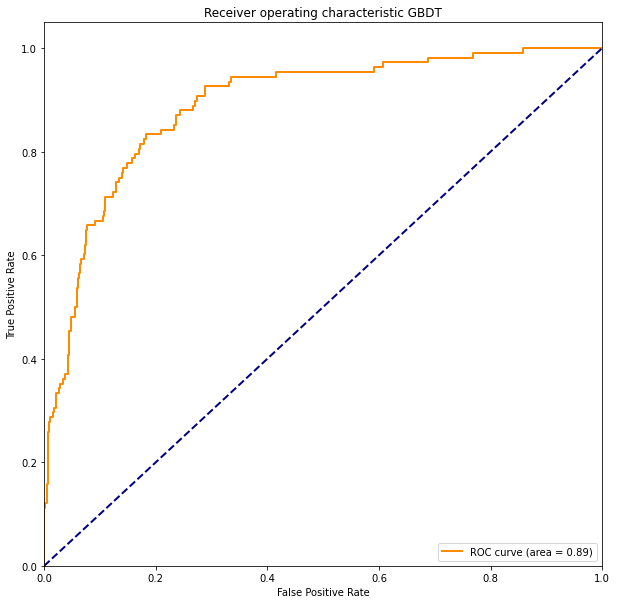

In [44]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predprob)

roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic GBDT')
plt.legend(loc="lower right")
plt.show()

In [140]:
from scipy.stats import pearsonr

selector2 = SelectKBest(lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y)[0], X.T))).T, k=300)
X_pear = selector2.fit(df_x , y)

name_pear = selector2.get_feature_names_out()

df_pear = df_x[name_pear]

C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [141]:
df_pear

,jml_bp_mult_atom_rad,jml_hfus_add_bp,jml_mol_vol_add_bp,jml_C-8,jml_C-7,jml_C-6,jml_C-2,jml_C-1,jml_C-0,jml_mp_subs_elec_aff,...,density,mean ordering parameter shell 1,mean ordering parameter shell 2,mean ordering parameter shell 3,structural complexity per atom,crystal_system_int,transition metal fraction,max ionic char,avg ionic char,gap_AO
0,2049.453333,1310.884233,1327.130000,41.733333,65.366667,50.633333,49.533333,50.633333,67.633333,737.264000,...,4.945340,0.456030,0.165633,0.027349,1.378783,4,0.285714,0.209607,0.038059,0.063676
1,2522.626667,1782.214733,1797.296667,49.366667,96.433333,53.500000,53.566667,53.500000,96.033333,990.213000,...,3.833648,0.756102,0.431629,0.159981,2.821928,4,0.000000,0.792998,0.142625,0.000000
2,2203.761333,1645.883077,1656.126667,62.200000,145.766667,64.166667,62.200000,64.166667,145.766667,979.384667,...,3.101543,0.597112,0.321412,0.204273,3.000000,5,0.125000,0.820234,0.142420,0.000000
3,2354.261333,1706.887783,1718.740000,56.200000,111.400000,56.933333,56.200000,56.933333,111.400000,1056.158000,...,2.175750,0.655228,0.475803,0.228999,2.128085,2,0.000000,0.917619,0.214967,0.209862
4,3351.411333,2367.576783,2382.846667,78.300000,203.433333,92.333333,78.300000,92.333333,203.433333,1297.392333,...,2.574819,0.725754,0.520593,0.256700,3.000000,6,0.000000,0.792998,0.178436,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1706.496250,1231.100713,1243.225000,44.300000,82.800000,45.800000,43.175000,45.800000,83.500000,591.894250,...,3.363133,0.531845,0.251025,0.111117,3.584963,7,0.250000,0.894601,0.162920,0.000000
2859,2434.392500,1781.624513,1793.902500,47.275000,157.700000,50.300000,51.575000,50.300000,149.850000,747.115500,...,3.811793,0.919347,0.610157,0.401045,4.000000,7,0.062500,0.779730,0.169250,0.000000
2860,2448.367500,2285.136075,2295.490000,40.825000,342.475000,92.400000,42.225000,92.400000,341.875000,1528.947000,...,2.925293,0.737781,0.516057,0.297199,3.000000,5,0.125000,0.779730,0.123519,0.000000
2861,1706.496250,1231.100713,1243.225000,44.300000,82.800000,45.800000,43.175000,45.800000,83.500000,591.894250,...,3.505517,0.599136,0.256130,0.117330,3.238901,6,0.230769,0.894601,0.178934,0.000000


In [142]:
X_pear = df_pear.values

label_pear = df_pear.columns

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_pear,y)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_pear.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, label_pear[indices[f]], importances[indices[f]]))

 1) density                        0.013639
 2) jml_vpa                        0.011153
 3) mean ordering parameter shell 2 0.011051
 4) crystal_system_int             0.010994
 5) mean ordering parameter shell 3 0.010033
 6) jml_mol_vol_divi_polzbl        0.009629
 7) xrd_56                         0.009050
 8) jml_voro_coord_divi_polzbl     0.008674
 9) jml_voro_coord_divi_hfus       0.008656
10) jml_first_ion_en_divi_hfus     0.008628
11) jml_ndunfill                   0.008524
12) jml_atom_rad_divi_polzbl       0.008482
13) xrd_32                         0.008355
14) mean ordering parameter shell 1 0.008299
15) xrd_33                         0.008255
16) jml_first_ion_en_divi_therm_cond 0.008249
17) transition metal fraction      0.008141
18) jml_mol_vol_divi_hfus          0.008032
19) jml_atom_rad_divi_hfus         0.008026
20) xrd_31                         0.007855
21) xrd_55                         0.007829
22) jml_atom_mass_divi_polzbl      0.007706
23) avg ionic char         

In [150]:
dist2

['density',
 'jml_vpa',
 'mean ordering parameter shell 2',
 'crystal_system_int',
 'mean ordering parameter shell 3',
 'jml_mol_vol_divi_polzbl',
 'xrd_56',
 'jml_voro_coord_divi_polzbl',
 'jml_voro_coord_divi_hfus',
 'jml_first_ion_en_divi_hfus',
 'jml_ndunfill',
 'jml_atom_rad_divi_polzbl',
 'xrd_32',
 'mean ordering parameter shell 1',
 'xrd_33',
 'jml_first_ion_en_divi_therm_cond',
 'transition metal fraction',
 'jml_mol_vol_divi_hfus',
 'jml_atom_rad_divi_hfus',
 'xrd_31',
 'xrd_55',
 'jml_atom_mass_divi_polzbl',
 'avg ionic char',
 'jml_first_ion_en_divi_polzbl',
 'jml_nn_59',
 'jml_nn_29',
 'jml_bp_divi_polzbl',
 'xrd_57',
 'jml_X_subs_elec_aff',
 'structural complexity per atom',
 'jml_mp_divi_hfus',
 'jml_polzbl_mult_mp',
 'xrd_62',
 'jml_bp_mult_atom_mass',
 'jml_atom_mass_divi_hfus',
 'jml_nn_98',
 'xrd_54',
 'jml_nn_85',
 'xrd_63',
 'jml_polzbl_subs_mol_vol',
 'jml_C-1',
 'jml_atom_rad_divi_bp',
 'jml_C-6',
 'jml_nn_57',
 'jml_nn_100',
 'jml_nn_77',
 'jml_nn_88',
 'jml_nn_

In [147]:
dist2 = []
for i in range(X_pear.shape[1]):
    dist2.append(label_pear[indices[i]])

In [149]:
X_pear_impo = df_pear[dist2].values

best(X_pear_impo,y)

(0.5498307447232178, 0.7591623036649214) 2
(0.5954101951413779, 0.7591623036649214) 3
(0.6996515332536838, 0.7801047120418848) 4
(0.7294305057745917, 0.7766143106457243) 5
(0.8195141377937076, 0.8324607329842932) 6
(0.8255276782158503, 0.8394415357766143) 7
(0.8255475906013541, 0.8359511343804538) 8
(0.8391676622859419, 0.8411867364746946) 9
(0.840063719633612, 0.8411867364746946) 10
(0.8401035444046198, 0.8411867364746946) 11
(0.8536041417761848, 0.8446771378708552) 12
(0.8437674233373159, 0.849912739965096) 13
(0.8579649542015134, 0.8411867364746946) 14
(0.8573277578653924, 0.8568935427574171) 15
(0.8547789725209081, 0.8446771378708552) 16
(0.849442453205894, 0.8429319371727748) 17
(0.8583432895260852, 0.8464223385689355) 18
(0.8531660692951015, 0.837696335078534) 19
(0.8451612903225807, 0.8359511343804538) 20
(0.848168060533652, 0.8342059336823735) 21
(0.8425925925925926, 0.8464223385689355) 22
(0.8463361210673037, 0.837696335078534) 23
(0.8422939068100358, 0.8481675392670157) 24
(0